In [1]:
!pip install gensim


In [2]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[==================================================] 100.0% 128.1/128.1MB downloaded
[('cat', 0.8798075318336487), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [8]:

#find the most similar words to a word of your choice. 
print(model.most_similar('java'))
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

[('sumatra', 0.6641600131988525), ('surabaya', 0.6600468158721924), ('semarang', 0.6302395462989807), ('sulawesi', 0.6134429574012756), ('yogyakarta', 0.603346049785614), ('bandung', 0.6005890369415283), ('mindanao', 0.5711928606033325), ('banten', 0.5604900121688843), ('borneo', 0.5586321949958801), ('luzon', 0.5567312240600586)]


This result makes sense to me, I wanted to test the word Java becaue I could have seen it having several contexts which it appears frequently on wikipedia, leading to many possible outcomes for the most similar words. It is both an island in Indonesia, with the most populous city (Jakarta), being on Java, associated with coffee, and an important programming language, the most similar words ended up being one of the things I thought it would be, the outcome being the other major islands in Indonesia.

In [4]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.6407975554466248), ('le', 0.6403627991676331), ('strasbourg', 0.6346525549888611)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403284788131714)]
[('dogs', 0.8921768069267273), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512701153755188), ('pets', 0.7392118573188782), ('cows', 0.6835323572158813), ('pet', 0.679297685623169), ('horses', 0.6774963736534119), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [5]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736048221588), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772217750549316),
 ('dentist', 0.669424295425415),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [12]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 

# I tried to get it to produce the thing that allows an object to move, I wanted to take the difference of wheel and car and add this to horse with the desired outcome being hoof or foot, but I did not succeed

#does this show any bias or assumptions in the data? 
movement = model['wheel'] - model['car']
print(model.most_similar(movement + model["horse"])) 
print(model.most_similar(movement + model["camel"])) 
print(model.most_similar(movement + model["boat"])) 

# Discuss with your group and share most interesting dimension in the document

[('horse', 0.7442640662193298), ('horses', 0.6095911264419556), ('wheel', 0.5870479941368103), ('chariot', 0.5852705836296082), ('saddle', 0.5754228234291077), ('paddle', 0.5375407338142395), ('dragon', 0.5374563932418823), ('harness', 0.5307038426399231), ('snake', 0.5305818915367126), ('serpent', 0.5125377178192139)]
[('camel', 0.7506988048553467), ('dromedary', 0.5751116275787354), ('paddle', 0.5228607058525085), ('wheel', 0.5053073167800903), ('mule', 0.5029001235961914), ('stripe', 0.4903073310852051), ('crisps', 0.4776458144187927), ('spoked', 0.4752599596977234), ('ostrich', 0.4710506200790405), ('feather', 0.4700677692890167)]
[('boat', 0.7458565831184387), ('paddle', 0.734903872013092), ('boats', 0.6663755178451538), ('sail', 0.6548564434051514), ('sailing', 0.6381471157073975), ('vessel', 0.6271765828132629), ('tug', 0.6173896789550781), ('ship', 0.5969249606132507), ('steamer', 0.5903245806694031), ('wheel', 0.5882200002670288)]


Part 2: Visualization and Embeddings in Space

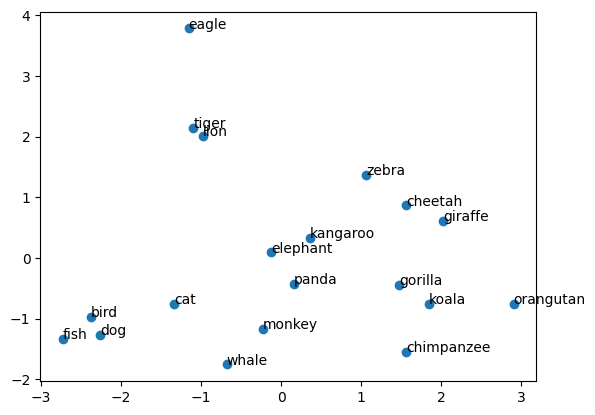

In [6]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

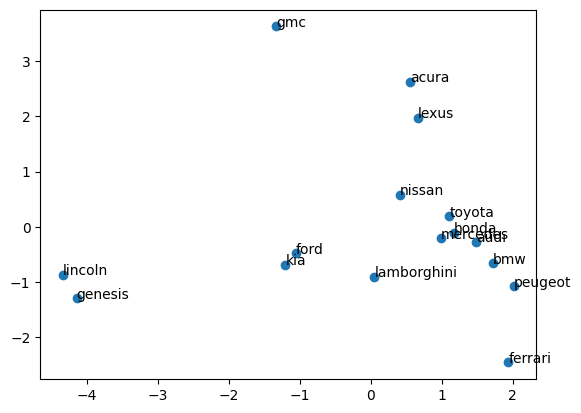

In [17]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words=["honda", "acura", "nissan", "genesis", "toyota", "lexus", "kia", "bmw", "mercedes", "audi", "peugeot", "lincoln", "ford", "gmc", "ferrari", "lamborghini" ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


It doesn't necessarily make sense how the model has group this auto brands, I would have assumed it would put luxury vehicles closer together or maybe by country of origin, but ther are no discernible trends of this manner.

In [19]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

[==================================================] 100.0% 387.1/387.1MB downloaded


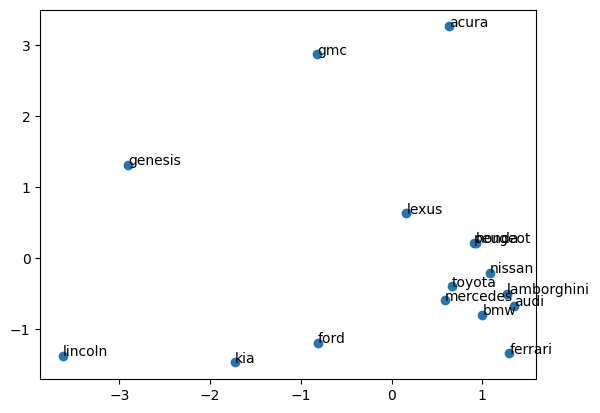

In [22]:
words=["honda", "acura", "nissan", "genesis", "toyota", "lexus", "kia", "bmw", "mercedes", "audi", "peugeot", "lincoln", "ford", "gmc", "ferrari", "lamborghini" ]

X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

Not much actually changed in the way the relationships between the words were represented graphically, They are actually in relatively similar positions between the two datasets and the words that were close to eachother before are still close however there does not appear to be any distinct relationships in either set.

Part 3: Embedding reddit posts

In [24]:
import pandas as pd

In [25]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [ ]:
#using the code from project 1, clean the text and create a bag of words representation of the text


In [ ]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

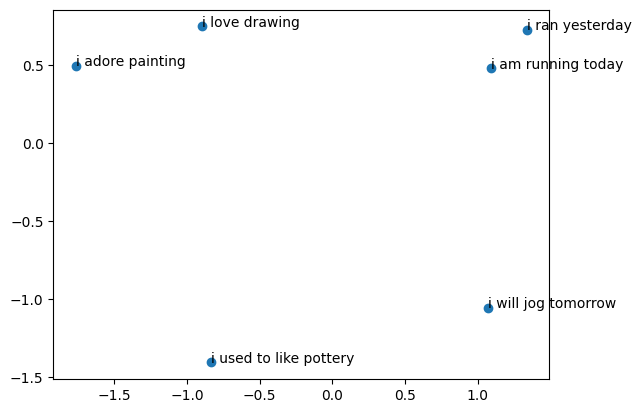

In [7]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

Part 4: HuggingFace and BERT

In [ ]:
!pip install transformers

In [100]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

c:\Users\lucia\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lucia\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [101]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [ ]:
#is the UIUC or Michigan subreddit more negative?